In [1]:
from pathlib import Path
import pandas as pd
from alphalens.tears import create_summary_tear_sheet
from alphalens.utils import get_clean_factor_and_forward_returns

In [2]:
# GLOBAL SETTINGS

# Directories
model_dataDir = 'DATA/MODELDATA/'
model_plot_dataDir = 'DATA/MODELRESULTS/'

# Time
START = 2020
END = 2022



#Helpers
idx = pd.IndexSlice



In [3]:
# Helper Functions
def get_trade_prices(start, stop):
    model_mdf = pd.read_csv(model_dataDir + 'ModelData.csv')
    model_mdf.rename(columns={'Unnamed: 0': 'Dates'}, inplace=True)
    model_mdf['Dates'] = pd.to_datetime(model_mdf['Dates'])
    model_mdf.set_index(['Dates', 'Coin'], inplace=True)
    model_mdf = model_mdf.loc[:,'Open']
    #model_mdf = model_mdf.loc[idx[tickers, str(START):str(END)], 'Open']
    prices = model_mdf.unstack('Coin').sort_index().shift(-1).tz_localize('UTC')
    
    return prices



def get_best_alpha(scores):
    return scores.groupby('alpha').ic.mean().idxmax()


def get_factor(predictions):
    return (predictions.unstack('Coin')
            .dropna(how='all')
            .stack()
            .tz_localize('UTC', level='Dates')
            .sort_index())    

In [4]:
# Load the Model Results Data
lr_predictions = pd.read_hdf(f'{model_dataDir}lr_model_predictions.h5', 'lr/predictions')
ridge_scores = pd.read_hdf(f'{model_dataDir}Ridge_Scores.h5', 'ridge/scores')
ridge_predictions = pd.read_hdf(f'{model_dataDir}Ridge_Predictions.h5', 'ridge/predictions')
lasso_scores = pd.read_hdf(f'{model_dataDir}Lasso_Scores.h5', 'lasso/scores')
lasso_predictions = pd.read_hdf(f'{model_dataDir}Lasso_Predictions.h5', 'lasso/predictions')

# Load the OHLV Price data
#model_mdf = pd.read_csv(model_dataDir + 'ModelData.csv')
#model_mdf.rename(columns={'Unnamed: 0': 'Dates'}, inplace=True)
#model_mdf['Dates'] = pd.to_datetime(model_mdf['Dates'])
#model_mdf.set_index(['Dates', 'Coin'], inplace=True)
#model_mdf = model_mdf.loc[:,'Open':'Volume']
#prices = model_mdf.unstack('Coin').sort_index().shift(-1).tz_localize('UTC')

In [5]:
# Now we will check the Alpha and Beta metrics of the signals found by our models in the prior step

In [6]:
# From Linear Regression
lr_factor = get_factor(lr_predictions.predicted.swaplevel())
lr_factor.head()

Dates                      Coin                 
2020-04-11 00:00:00+00:00  algorand                -0.012839
                           arweave                  0.021231
                           basic-attention-token   -0.005332
                           binancecoin             -0.009988
                           bitcoin                 -0.016947
dtype: float64

In [7]:
#tickers = lr_factor.index.get_level_values('Coin').unique()

In [8]:
trade_prices = get_trade_prices(2020, 2022)
#trade_prices.info()

In [9]:
#print(len(trade_prices.columns))

In [10]:
trade_prices.head()

Coin,algorand,arweave,basic-attention-token,binancecoin,bitcoin,bitcoin-cash,bitcoin-cash-sv,bittorrent-2,cardano,chainlink,...,monero,okb,ripple,stellar,terra-luna,tezos,theta-token,tron,vechain,zcash
Dates,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00+00:00,0.217110,0.652953,0.190072,13.522027,7139.044338,201.799270,95.251893,0.000280,0.032875,1.784257,...,45.668221,2.583228,0.191127,0.044894,0.217308,1.351242,0.085440,0.013090,0.005313,27.657228
2020-01-02 00:00:00+00:00,0.225794,0.698436,0.185653,13.579740,7196.883716,203.727639,96.466791,0.000283,0.033663,1.780386,...,48.339400,2.612412,0.190122,0.045167,0.204538,1.272692,0.085352,0.013154,0.005259,27.393856
2020-01-03 00:00:00+00:00,0.228031,0.668637,0.186281,13.650140,7320.309525,221.811173,104.624500,0.000289,0.033864,1.791668,...,50.422485,2.619287,0.192036,0.045401,0.231951,1.277193,0.088620,0.013391,0.005350,28.276526
2020-01-04 00:00:00+00:00,0.234223,0.597861,0.190017,13.972162,7448.688305,223.863172,110.612056,0.000290,0.034543,1.804323,...,51.035368,2.678726,0.194730,0.045771,0.239527,1.268082,0.092812,0.013656,0.005580,30.396363
2020-01-05 00:00:00+00:00,0.233386,0.722573,0.191317,14.380112,7520.122401,236.732977,115.716651,0.000296,0.035271,1.838128,...,55.979012,2.711035,0.196440,0.046401,0.234815,1.268031,0.099747,0.013867,0.005519,31.452828


In [11]:
# Get forward returns and Quantiles
lr_factor_data = get_clean_factor_and_forward_returns(factor=lr_factor,
                                                      prices=trade_prices,
                                                      quantiles=5,
                                                      periods=(1, 7, 14, 30, 60, 90))
lr_factor_data.info()

Dropped 14.0% entries from factor data: 14.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 22712 entries, (Timestamp('2020-04-11 00:00:00+0000', tz='UTC', freq='C'), 'algorand') to (Timestamp('2021-10-16 00:00:00+0000', tz='UTC', freq='C'), 'zcash')
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   1D               22712 non-null  float64
 1   7D               22712 non-null  float64
 2   14D              22712 non-null  float64
 3   30D              22712 non-null  float64
 4   60D              22712 non-null  float64
 5   90D              22712 non-null  float64
 6   factor           22712 non-null  float64
 7   factor_quantile  22712 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 1.5+ MB


Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-0.212637,0.049691,-0.013773,0.022191,4984,21.944347
2,-0.076172,0.059845,0.001310,0.016413,4432,19.513913
3,-0.067003,0.072918,0.007468,0.016532,4432,19.513913
4,-0.055424,0.080337,0.013582,0.016799,4432,19.513913
5,-0.032475,0.150405,0.025120,0.019196,4432,19.513913


Returns Analysis


,1D,7D,14D,30D,60D,90D
Ann. alpha,1.799,0.667,0.347,-0.237,-0.958,-0.303
beta,-0.024,0.115,0.238,0.601,1.135,0.569
Mean Period Wise Return Top Quantile (bps),40.410,37.163,41.506,77.279,107.858,92.349
Mean Period Wise Return Bottom Quantile (bps),-24.343,-28.325,-36.380,-50.170,-97.193,-46.499
Mean Period Wise Spread (bps),64.753,64.243,73.248,67.940,56.140,34.378


Information Analysis


,1D,7D,14D,30D,60D,90D
IC Mean,0.055,0.072,0.096,0.126,0.139,0.160
IC Std.,0.215,0.221,0.215,0.233,0.252,0.234
Risk-Adjusted IC,0.254,0.328,0.446,0.543,0.550,0.684
t-stat(IC),5.985,7.710,10.503,12.783,12.944,16.110
p-value(IC),0.000,0.000,0.000,0.000,0.000,0.000
IC Skew,0.087,-0.098,-0.122,0.163,-0.108,-0.056
IC Kurtosis,-0.571,-0.510,-0.200,-0.477,-0.430,-0.220


Turnover Analysis


,1D,7D,14D,30D,60D,90D
Quantile 1 Mean Turnover,0.377,0.550,0.660,0.728,0.782,0.797
Quantile 2 Mean Turnover,0.583,0.709,0.748,0.787,0.791,0.783
Quantile 3 Mean Turnover,0.616,0.740,0.776,0.778,0.788,0.786
Quantile 4 Mean Turnover,0.589,0.720,0.758,0.803,0.815,0.794
Quantile 5 Mean Turnover,0.389,0.544,0.620,0.718,0.762,0.765


,1D,7D,14D,30D,60D,90D
Mean Factor Rank Autocorrelation,0.669,0.438,0.266,0.088,-0.004,-0.011


<Figure size 432x288 with 0 Axes>

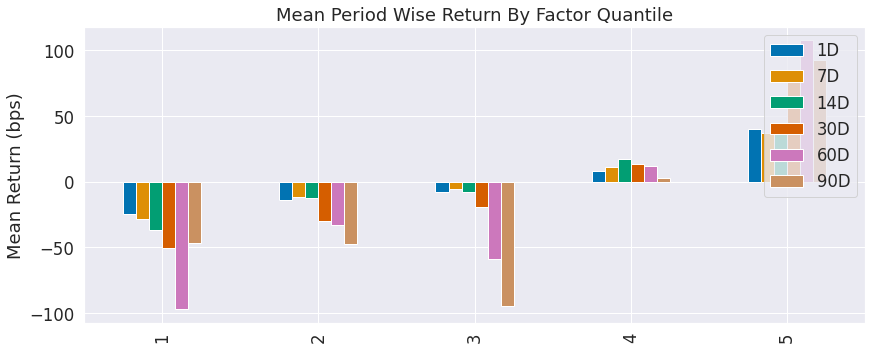

In [12]:
create_summary_tear_sheet(lr_factor_data);

In [13]:
# From Ridge
best_ridge_alpha = get_best_alpha(ridge_scores)
ridge_predictions = ridge_predictions[ridge_predictions.alpha==best_ridge_alpha].drop('alpha', axis=1)

In [14]:
ridge_factor = get_factor(ridge_predictions.predicted.swaplevel())
ridge_factor.head()

Dates                      Coin                 
2020-04-11 00:00:00+00:00  algorand                -0.000997
                           arweave                  0.017353
                           basic-attention-token    0.001485
                           binancecoin             -0.001140
                           bitcoin                 -0.004565
dtype: float64

In [15]:
ridge_factor_data = get_clean_factor_and_forward_returns(factor=ridge_factor,
                                                         prices=trade_prices,
                                                         quantiles=5,
                                                         periods=(1, 7, 14, 30, 60, 90))
ridge_factor_data.info()

Dropped 14.0% entries from factor data: 14.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 22712 entries, (Timestamp('2020-04-11 00:00:00+0000', tz='UTC', freq='C'), 'algorand') to (Timestamp('2021-10-16 00:00:00+0000', tz='UTC', freq='C'), 'zcash')
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   1D               22712 non-null  float64
 1   7D               22712 non-null  float64
 2   14D              22712 non-null  float64
 3   30D              22712 non-null  float64
 4   60D              22712 non-null  float64
 5   90D              22712 non-null  float64
 6   factor           22712 non-null  float64
 7   factor_quantile  22712 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 1.5+ MB


Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-0.133683,0.012810,-0.015576,0.014757,4984,21.944347
2,-0.056449,0.015324,-0.006520,0.009625,4432,19.513913
3,-0.050735,0.017977,-0.002785,0.008318,4432,19.513913
4,-0.041948,0.023287,0.000888,0.007342,4432,19.513913
5,-0.032449,0.073827,0.008176,0.009193,4432,19.513913


Returns Analysis


,1D,7D,14D,30D,60D,90D
Ann. alpha,3.251,1.161,1.061,0.811,-0.604,0.237
beta,-0.009,0.136,0.084,0.218,0.629,0.385
Mean Period Wise Return Top Quantile (bps),64.359,53.093,50.804,71.817,98.900,92.044
Mean Period Wise Return Bottom Quantile (bps),-38.336,-36.022,-37.343,-42.500,-42.316,-24.684
Mean Period Wise Spread (bps),102.696,86.881,78.125,85.529,72.811,56.127


Information Analysis


,1D,7D,14D,30D,60D,90D
IC Mean,0.056,0.079,0.097,0.130,0.152,0.172
IC Std.,0.210,0.214,0.211,0.226,0.235,0.230
Risk-Adjusted IC,0.265,0.371,0.457,0.576,0.649,0.746
t-stat(IC),6.246,8.727,10.755,13.549,15.265,17.555
p-value(IC),0.000,0.000,0.000,0.000,0.000,0.000
IC Skew,0.034,-0.005,0.086,0.296,-0.034,-0.268
IC Kurtosis,-0.278,-0.418,-0.336,-0.182,-0.357,0.091


Turnover Analysis


,1D,7D,14D,30D,60D,90D
Quantile 1 Mean Turnover,0.418,0.542,0.636,0.721,0.773,0.782
Quantile 2 Mean Turnover,0.605,0.716,0.736,0.782,0.781,0.785
Quantile 3 Mean Turnover,0.628,0.726,0.757,0.783,0.791,0.783
Quantile 4 Mean Turnover,0.601,0.698,0.732,0.780,0.806,0.808
Quantile 5 Mean Turnover,0.425,0.545,0.615,0.674,0.746,0.743


,1D,7D,14D,30D,60D,90D
Mean Factor Rank Autocorrelation,0.593,0.423,0.3,0.142,0.025,0.025


<Figure size 432x288 with 0 Axes>

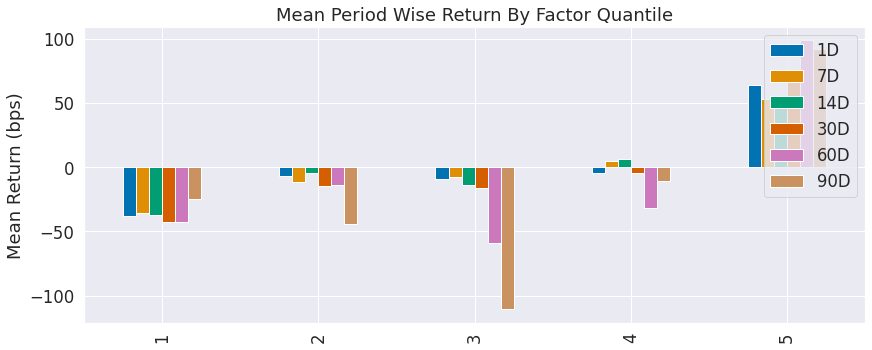

In [16]:
create_summary_tear_sheet(ridge_factor_data);

In [17]:
# From Lasso
best_lasso_alpha = get_best_alpha(lasso_scores)
lasso_predictions = lasso_predictions[lasso_predictions.alpha==best_lasso_alpha].drop('alpha', axis=1)

In [18]:
lasso_factor = get_factor(lasso_predictions.predicted.swaplevel())
lasso_factor.head()

Dates                      Coin                 
2020-04-11 00:00:00+00:00  algorand                 0.002263
                           arweave                  0.015594
                           basic-attention-token    0.005645
                           binancecoin              0.004232
                           bitcoin                  0.000771
dtype: float64

In [19]:
lasso_factor_data = get_clean_factor_and_forward_returns(factor=lasso_factor,
                                                      prices=trade_prices,
                                                      quantiles=5,
                                                      periods=(1, 7, 14, 30, 60, 90))
lasso_factor_data.info()

Dropped 14.0% entries from factor data: 14.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 22712 entries, (Timestamp('2020-04-11 00:00:00+0000', tz='UTC', freq='C'), 'algorand') to (Timestamp('2021-10-16 00:00:00+0000', tz='UTC', freq='C'), 'zcash')
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   1D               22712 non-null  float64
 1   7D               22712 non-null  float64
 2   14D              22712 non-null  float64
 3   30D              22712 non-null  float64
 4   60D              22712 non-null  float64
 5   90D              22712 non-null  float64
 6   factor           22712 non-null  float64
 7   factor_quantile  22712 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 1.5+ MB


Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-0.165834,0.018926,-0.017053,0.017108,4984,21.944347
2,-0.073293,0.023673,-0.006982,0.011313,4432,19.513913
3,-0.066089,0.027082,-0.002968,0.010037,4432,19.513913
4,-0.056338,0.030717,0.001118,0.008934,4432,19.513913
5,-0.044110,0.074071,0.009439,0.010939,4432,19.513913


Returns Analysis


,1D,7D,14D,30D,60D,90D
Ann. alpha,3.106,1.041,0.806,0.617,-0.503,0.187
beta,-0.014,0.152,0.153,0.289,0.591,0.360
Mean Period Wise Return Top Quantile (bps),61.462,54.337,50.199,69.009,94.486,93.085
Mean Period Wise Return Bottom Quantile (bps),-37.494,-38.370,-42.142,-48.153,-47.254,-22.125
Mean Period Wise Spread (bps),98.956,90.346,83.009,90.212,73.344,46.488


Information Analysis


,1D,7D,14D,30D,60D,90D
IC Mean,0.058,0.077,0.098,0.131,0.154,0.171
IC Std.,0.212,0.215,0.215,0.227,0.239,0.232
Risk-Adjusted IC,0.274,0.358,0.457,0.577,0.646,0.740
t-stat(IC),6.442,8.431,10.765,13.570,15.208,17.412
p-value(IC),0.000,0.000,0.000,0.000,0.000,0.000
IC Skew,0.013,-0.105,-0.032,0.233,0.023,-0.174
IC Kurtosis,-0.286,-0.404,-0.326,-0.199,-0.451,-0.000


Turnover Analysis


,1D,7D,14D,30D,60D,90D
Quantile 1 Mean Turnover,0.433,0.564,0.645,0.728,0.773,0.784
Quantile 2 Mean Turnover,0.601,0.713,0.741,0.771,0.786,0.794
Quantile 3 Mean Turnover,0.634,0.735,0.753,0.786,0.798,0.794
Quantile 4 Mean Turnover,0.608,0.713,0.741,0.785,0.802,0.807
Quantile 5 Mean Turnover,0.439,0.574,0.639,0.693,0.742,0.751


,1D,7D,14D,30D,60D,90D
Mean Factor Rank Autocorrelation,0.562,0.377,0.253,0.109,0.01,0.01


<Figure size 432x288 with 0 Axes>

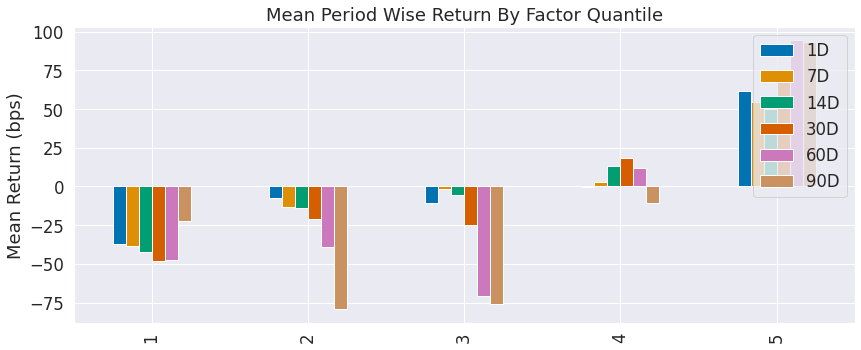

In [20]:
create_summary_tear_sheet(lasso_factor_data);